P(purchased)= 0.4955
P(purchased|Male)= 0.496875
P(Male|purchased)= 0.48133198789101916
Random sample mean purchased= 0.48
Stratified sample distribution:
 age_group
26-35    0.370
36-50    0.275
18-25    0.215
50+      0.140
Name: proportion, dtype: float64


/tmp/ipython-input-220329670.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strata = df.groupby('age_group', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=2))


Text(0.5, 1.0, 'CLT: distribution of sample means (income)')

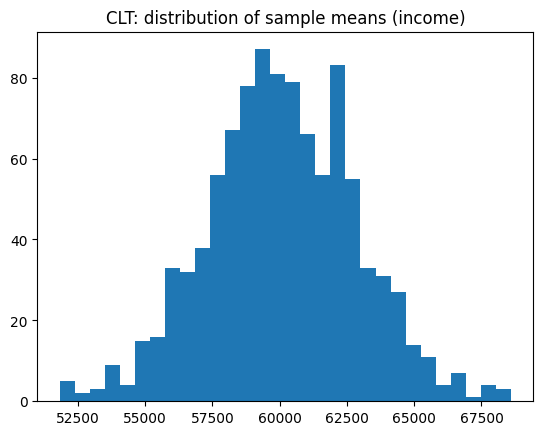

In [3]:
import numpy as np
import pandas as pd
np.random.seed(0)
n = 2000
gender = np.random.choice(['Male','Female'], size=n, p=[0.48,0.52])
age = np.random.choice(['18-25','26-35','36-50','50+'], size=n, p=[0.22,0.35,0.28,0.15])
income = np.round(np.random.normal(60000,20000,size=n)).astype(int)
visited_pages = np.random.poisson(5, size=n)
purchased = ((income>50000).astype(int) & (visited_pages>3).astype(int))
df = pd.DataFrame({'gender':gender,'age_group':age,'income':income,'visited_pages':visited_pages,'purchased':purchased})
p_purchased = df['purchased'].mean()
print('P(purchased)=', p_purchased)
print('P(purchased|Male)=', df.loc[df.gender=='Male','purchased'].mean())
p_male = (df.gender=='Male').mean()
p_p_given_m = df.loc[df.gender=='Male','purchased'].mean()
p_m_given_p = (p_p_given_m * p_male) / p_purchased
print('P(Male|purchased)=', p_m_given_p)
sample_rand = df.sample(200, random_state=1)
print('Random sample mean purchased=', sample_rand['purchased'].mean())
strata = df.groupby('age_group', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=2))
print('Stratified sample distribution:\n', strata['age_group'].value_counts(normalize=True))
means = [df['income'].sample(50).mean() for _ in range(1000)]
import matplotlib.pyplot as plt
plt.hist(means, bins=30); plt.title('CLT: distribution of sample means (income)')